In [2]:
#Importing a few important libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
#I was given data in xlsx format, I'm converting it to csv.
data_xls = pd.read_excel('daa1.xlsx', dtype=str, index_col=None)
data_xls.to_csv('daa_csv.csv', encoding='utf-8', index=False)

In [6]:
#Reading the data
data = pd.read_csv("/home/shashank/Documents/MerkleSokrati/Project1/daa_csv.csv")

In [7]:
#1 Understanding the Data

In [9]:
#See what the starting few data points look like
data.head()

,Date,product,phase,campaign_platform,campaign_type,communication_medium,subchannel,audience_type,creative_type,creative_name,device,age,spends,impressions,clicks,link_clicks
0,2019-10-16 00:00:00,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,18-24,0.00,2,0,0.0
1,2019-10-16 00:00:00,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,25-34,0.00,5,0,0.0
2,2019-10-16 00:00:00,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,35-44,0.00,1,0,0.0
3,2019-10-16 00:00:00,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,Undetermined,14.63,5,3,0.0
4,2019-10-18 00:00:00,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,18-24,53.31,10,2,0.0


In [11]:
#See what the last few data points look like
data.tail()

,Date,product,phase,campaign_platform,campaign_type,communication_medium,subchannel,audience_type,creative_type,creative_name,device,age,spends,impressions,clicks,link_clicks
16829,2020-07-07 00:00:00,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Mobile,25-34,19.88,36,15,0.0
16830,2020-07-07 00:00:00,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Mobile,35-44,1.64,11,1,0.0
16831,2020-07-07 00:00:00,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Mobile,45-54,0.00,3,0,0.0
16832,2020-07-07 00:00:00,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Mobile,65 or more,0.00,3,0,0.0
16833,2020-07-07 00:00:00,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Mobile,Undetermined,1.40,14,1,0.0


In [13]:
#Getting to know the number of Rows and Columns
data.shape

(16834, 16)

In [14]:
#This shows how the values are distribued and get a genral idea of the data.
#This shows only the data that has numbers.
data.describe()

,spends,impressions,clicks,link_clicks
count,16834.000000,16834.000000,16834.000000,16288.000000
mean,148.694236,287.959190,11.977783,2.170371
std,483.895724,2444.450313,44.796963,18.659132
min,0.000000,0.000000,0.000000,0.000000
25%,0.180000,3.000000,0.000000,0.000000
50%,22.535000,13.000000,2.000000,0.000000
75%,110.020000,64.000000,8.000000,0.000000
max,9221.960000,67454.000000,1075.000000,450.000000


In [15]:
#Getting all the Column Names
data.columns

Index(['Date', 'product', 'phase', 'campaign_platform', 'campaign_type',
       'communication_medium', 'subchannel', 'audience_type', 'creative_type',
       'creative_name', 'device', 'age', 'spends', 'impressions', 'clicks',
       'link_clicks'],
      dtype='object')

In [54]:
#Getting all the unique values and which columns are the most Unique
data.nunique()

Date                     257
campaign_platform          2
campaign_type              2
communication_medium       2
subchannel                 4
audience_type              4
creative_type              3
creative_name              4
device                     4
age                        7
spends                  9087
impressions             1188
clicks                   263
link_clicks              160
dtype: int64

In [55]:
#Now we can play around with the less unique valued columns

In [ ]:
#Checking those unique values in the same.

In [17]:
data['campaign_platform'].unique()

array(['Google Ads', 'Facebook Ads'], dtype=object)

In [18]:
data['campaign_type'].unique()

array(['Search', 'Conversions'], dtype=object)

In [19]:
data['communication_medium'].unique()

array(['Search Keywords', 'Creative'], dtype=object)

In [20]:
data['subchannel'].unique()

array(['Brand', 'Competitor', 'Generic', 'Facebook Ads'], dtype=object)

In [21]:
data['audience_type'].unique()

array(["'-", 'Audience 2', 'Audience 3', 'Audience 1'], dtype=object)

In [22]:
data['creative_type'].unique()

array(["'-", 'Carousal', 'Image'], dtype=object)

In [23]:
data['creative_name'].unique()

array(["'-", 'Carousal', 'Click', 'Girl'], dtype=object)

In [24]:
data['device'].unique()

array(['Desktop', 'Mobile', 'Tablet', 'device'], dtype=object)

In [25]:
data['age'].unique()

array(['18-24', '25-34', '35-44', 'Undetermined', '45-54', '55-64',
       '65 or more'], dtype=object)

In [26]:
data.isnull().sum()

Date                      0
product                   0
phase                     0
campaign_platform         0
campaign_type             0
communication_medium      0
subchannel                0
audience_type             0
creative_type             0
creative_name             0
device                    0
age                       0
spends                    0
impressions               0
clicks                    0
link_clicks             546
dtype: int64

In [27]:
#data in Product and Phase is irrelevant for further analysis because only 1 product & phase is being looked into.
data = data.drop(['product','phase'], axis=1)

In [28]:
#Verifying previous operation
data.head()

,Date,campaign_platform,campaign_type,communication_medium,subchannel,audience_type,creative_type,creative_name,device,age,spends,impressions,clicks,link_clicks
0,2019-10-16 00:00:00,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,18-24,0.00,2,0,0.0
1,2019-10-16 00:00:00,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,25-34,0.00,5,0,0.0
2,2019-10-16 00:00:00,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,35-44,0.00,1,0,0.0
3,2019-10-16 00:00:00,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,Undetermined,14.63,5,3,0.0
4,2019-10-18 00:00:00,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,18-24,53.31,10,2,0.0


In [29]:
correlation = data.corr()

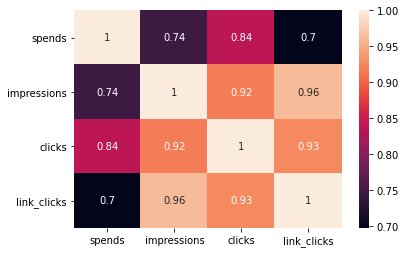

In [30]:
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)

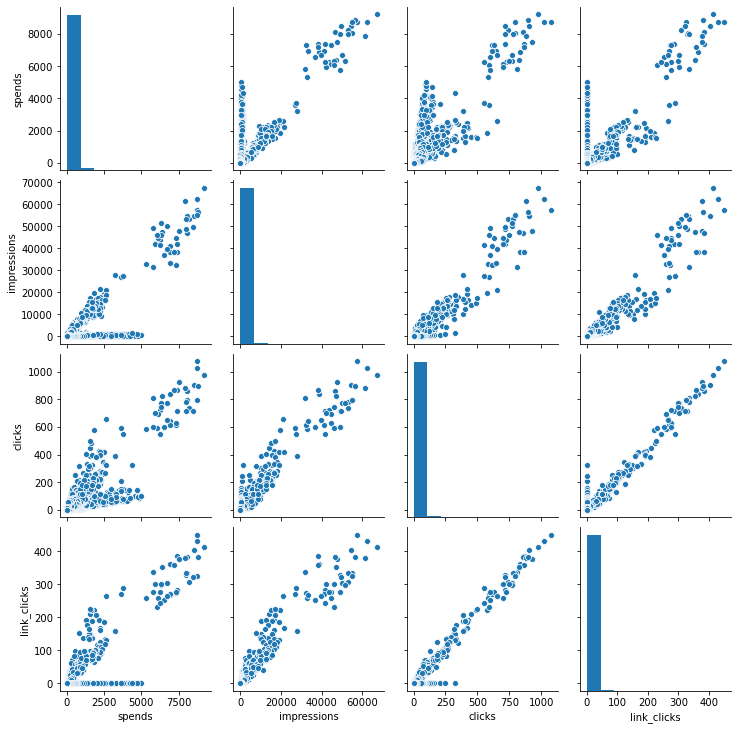

In [31]:
sns.pairplot(data)

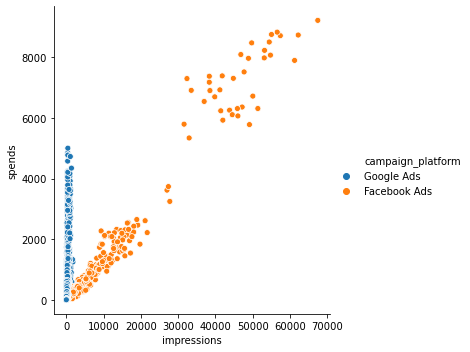

In [33]:
sns.relplot(x='impressions', y='spends', hue='campaign_platform', data=data)

In [34]:
#Here we can see that Facebook Ads are creating more Impressions and Spends.
#Also, in the case of Spends, Google Ads with less impressions also, it has more spends.

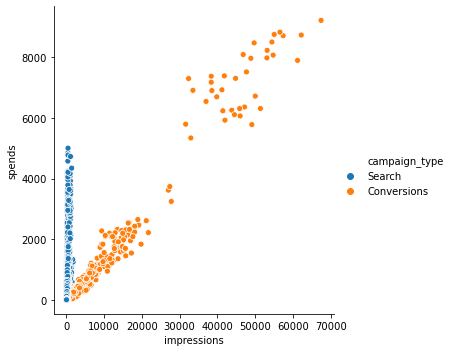

In [35]:
sns.relplot(x='impressions', y='spends', hue='campaign_type', data=data)

In [36]:
#Google spends and impressions directly corresponds to Search.
#Facebook spends and impressions directly corresponds to Conversions.

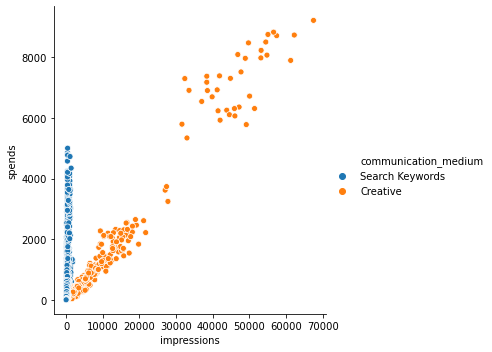

In [37]:
sns.relplot(x='impressions', y='spends', hue='communication_medium', data=data)

In [38]:
#Google spends and impressions directly corresponds to Search Keywords.
#Facebook spends and impressions directly corresponds to Creative.

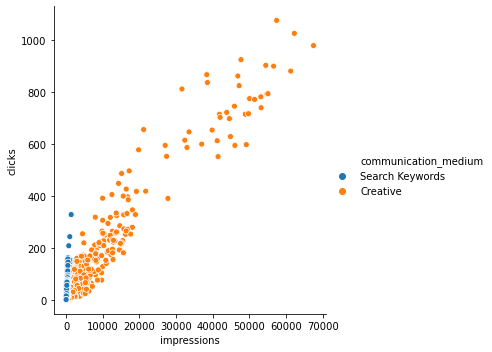

In [39]:
sns.relplot(x='impressions', y='clicks', hue='communication_medium', data=data)

In [40]:
#More Impressions implies More Clicks

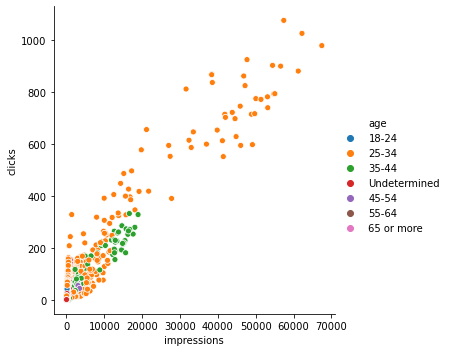

In [42]:
sns.relplot(x='impressions', y='clicks', hue='age', data=data)

In [43]:
#Most of the advertisements were aimed at 25-34 age group

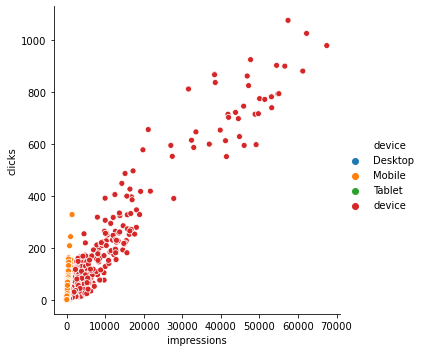

In [44]:
sns.relplot(x='impressions', y='clicks', hue='device', data=data)

In [45]:
#Doesn't help us

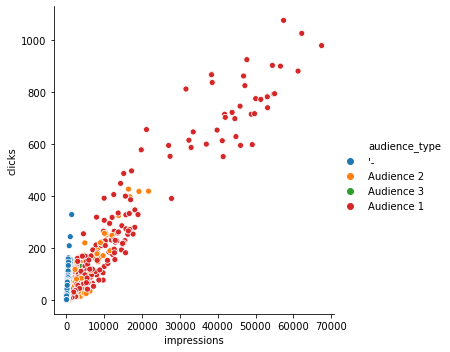

In [46]:
sns.relplot(x='impressions', y='clicks', hue='audience_type', data=data)

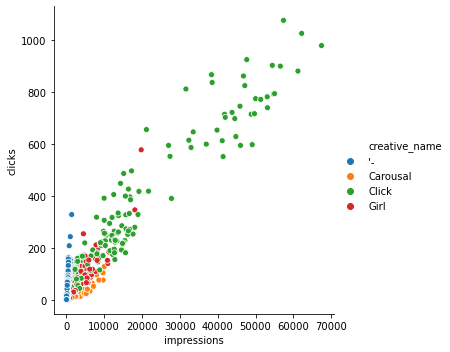

In [49]:
sns.relplot(x='impressions', y='clicks', hue='creative_name', data=data)

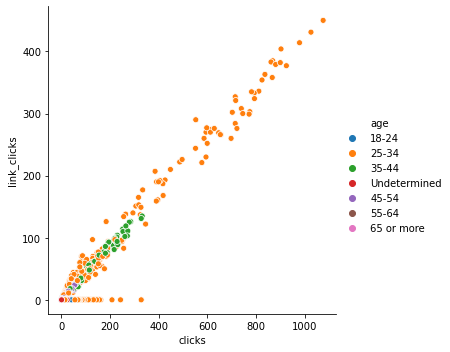

In [50]:
sns.relplot(x='clicks', y='link_clicks', hue='age', data=data)

In [51]:
#Most of the clicks and link clicks are done by the age group 25-34